### Take Home Assignment 2
#### Ranasinghe K.K.P.M EG-2018-3432

1.Consider an image with 2 objects and a total of 3-pixel values (1 for each object and one 
for the background). Add Gaussian noise to the image. Implement and test Otsu’s 
algorithm with this image.

In [1]:
import cv2
import numpy as np
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
# original image
image = cv2.imread('image1.png', 0)
f = image/255 


In [3]:
# create gaussian noise
x, y = f.shape
mean = 0
var = 0.01
sigma = np.sqrt(var)
n = np.random.normal(loc=mean, 
                     scale=sigma, 
                     size=(x,y))

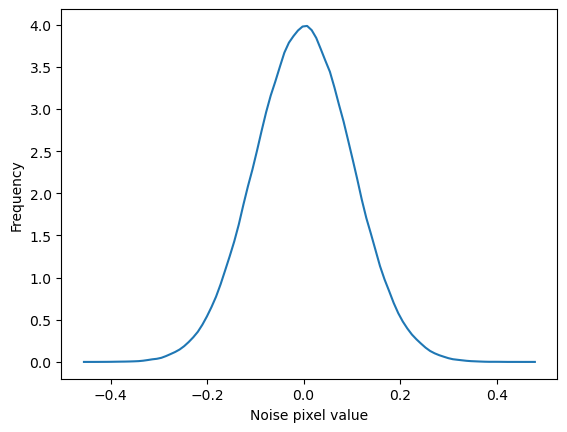

In [4]:
# display the probability density function (pdf)
kde = gaussian_kde(n.reshape(int(x*y)))
dist_space = np.linspace(np.min(n), np.max(n), 100)
plt.plot(dist_space, kde(dist_space))
plt.xlabel('Noise pixel value'); plt.ylabel('Frequency')
plt.show()

In [5]:
# add noise to the image
g = f + n


In [6]:
# display all
cv2.imshow('original image', f)
cv2.imshow('Gaussian noise', n)
cv2.imshow('Image after adding Gaussian noise', g)

cv2.waitKey(0)
cv2.destroyAllWindows()

Here is the result

## Rendered Output
|Original|Noise|Image With Noise|
|:-:|:-:|:-:|
|![Original](images/image1.png)|![Noise](images/gause_noise.png)|![Image With Noise](images/image_with_noise.png)

In [7]:
def save_image(img,name):
    img = cv2.convertScaleAbs(img, alpha=(255.0))
    cv2.imwrite(name,img)

In [8]:
save_image(f,"original_image.png")
save_image(g,"after_noise_image.png")

In [9]:
# get image with 0,255 values
def norm_image(img):
    img = cv2.convertScaleAbs(img, alpha=(255.0))
    return img

In [10]:
# Otsu's thresholding using OpenCV

image = norm_image(g)

ret1,th1 = cv2.threshold(image,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

cv2.imshow('Image after adding Gaussian noise', image)
cv2.imshow('otsu threshold image', th1)

cv2.waitKey(0)
cv2.destroyAllWindows()


## Rendered Output
|Image With Noise|Otsu Algorithm |
|:-:|:-:|
|![Image With Noise](images/image_with_noise.png)|![Original](images/otsu_threshold_image.png)|

In [13]:
# otsu thresholding python implementation scratch
def otsu_threshold(img):
    histg = cv2.calcHist([img],[0],None,[255],[0,255])
    within = []
    between = []
    d = 0
    for i in range(len(histg)):
        x,y =  np.split(histg,[i])
        x1 = np.sum(x)/(img.shape[0]*img.shape[1]) #weight of class 1
        y1 = np.sum(y)/(img.shape[0]*img.shape[1]) #weight of class 2
        x2 = np.sum([j*t for j,t in enumerate(x)])/np.sum(x)
        x2 = np.nan_to_num(x2)
        y2 = np.sum([(j+d)*t for j,t in enumerate(y)])/np.sum(y)
        x3 = np.sum([(j-x2)**2*t for j,t in enumerate(x)])/np.sum(x)
        x3 = np.nan_to_num(x3)
        y3 = np.sum([((j+d)-y2)**2*t for j,t in enumerate(y)])/np.sum(y)
        d = d + 1
        within.append(x1*x3 + y1*y3)
        between.append(x1*y1*(x2-y2)*(x2-y2))

    # get the index of the Within-class variance
    m = np.argmin(within)    
    # get the index of the Between-class variance
    n = np.argmax(between)
    return n 

In [16]:
n = otsu_threshold(image)
(thresh, Bin) = cv2.threshold(image, n, 255, cv2.THRESH_BINARY )
cv2.imshow('otsuscratch implementation',Bin)
cv2.imshow('otsu openCV imlementation', th1)
cv2.waitKey(0)
cv2.destroyAllWindows()

C:\Users\ranas\AppData\Local\Temp\ipykernel_16924\4206548344.py:11: RuntimeWarning: invalid value encountered in double_scalars
  x2 = np.sum([j*t for j,t in enumerate(x)])/np.sum(x)
C:\Users\ranas\AppData\Local\Temp\ipykernel_16924\4206548344.py:14: RuntimeWarning: invalid value encountered in double_scalars
  x3 = np.sum([(j-x2)**2*t for j,t in enumerate(x)])/np.sum(x)


## Rendered Output
|Otsu OpenCV|Otsu Python Code|
|:-:|:-:|
|![Otsu OpenCV](images/otsu_threshold_image.png)|![Otsu Sctrach](images/otsu_scratch.png)|